# Trimming a HALE aircraft with and without polar correction

To set up the polar correction, see tutorial. Each polar is provided as a 4-column array with AoA (rad), Cl, Cd and Cm

In [25]:
import numpy as np
from generate_trim import load_airfoil_tools_polars
import matplotlib.pyplot as plt

In [3]:
polar_2d = load_airfoil_tools_polars('./xf-naca0018-il-50000.csv')

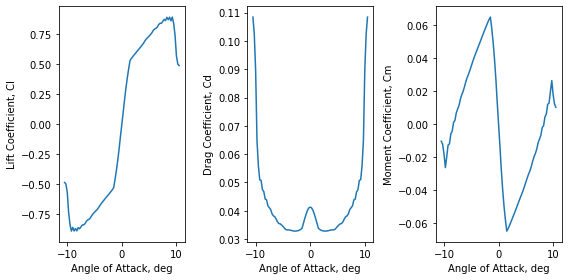

In [33]:
fig, ax = plt.subplots(ncols=3, figsize=(8, 4))

ax[0].plot(polar_2d[:, 0] * 180 / np.pi, polar_2d[:, 1])
ax[1].plot(polar_2d[:, 0] * 180 / np.pi, polar_2d[:, 2])
ax[2].plot(polar_2d[:, 0] * 180 / np.pi, polar_2d[:, 3])

for i in range(3):
    ax[i].set_xlabel('Angle of Attack, deg')
    
ax[0].set_ylabel('Lift Coefficient, Cl')
ax[1].set_ylabel('Drag Coefficient, Cd')#
ax[2].set_ylabel('Moment Coefficient, Cm')
plt.tight_layout()


In [14]:
cases = {}
cases['polar'] = {'name': 'hale_trim_polar1'}
cases['no_polar'] = {'name': 'hale_trim_polar0'}

In [35]:
for case in cases.values():
    print('\n--------\n', case['name'])
    all_forces = np.loadtxt(f'./output/{case["name"]}/{case["name"]}/forces/forces_aeroforces.txt', delimiter=',')
    case['forces_g'] = all_forces[1:4]
    case['moments_g'] = np.loadtxt(f'./output/{case["name"]}/{case["name"]}/forces/moments_aeroforces.txt', delimiter=',')[2]
    forces_out = 'D = {:04f} N\nY = {:04f} N\nL = {:04f} N\n'
    print(forces_out.format(*case['forces_g']))
    print('M = {:04f} Nm\n'.format(case['moments_g']))
    
    case['trim'] = np.loadtxt(f'./output/{case["name"]}/{case["name"]}/statictrim/trim_values.txt')
    case['trim'][:2] *= 180/np.pi
    trim_out = 'alpha = {:04f} deg\ndelta = {:04f} deg\nthrust = {:04f} N'
    print(trim_out.format(*case['trim']))


--------
 hale_trim_polar1
D = 48.047230 N
Y = -0.000000 N
L = 823.089900 N

M = -15.423860 Nm

alpha = 3.963777 deg
delta = 1.693058 deg
thrust = 48.143264 N

--------
 hale_trim_polar0
D = 6.389554 N
Y = 0.000000 N
L = 825.942600 N

M = 45.067810 Nm

alpha = 5.912928 deg
delta = 5.286617 deg
thrust = 6.386172 N
